In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import time
import sys
import os
from collections import Counter

In [3]:
nowpath=os.path.abspath('.')
nowpath

'C:\\AnacondaFonder\\1003 ML\\hw3-svm'

### Load Data

### 2 Calculating Subgradients
#### 2.1 Subgradients for pointwise maximum of functions

  Proof:
  Since $f_{k}(x)=f(x)$ at $x$ and $g\in\partial{f_{k}(x)}$,
  we have:
  $$g: f_{k}(z)\ge{f_{k}(x)}+g^{T}(z-x)=f(x)+g^{T}(z-x), \forall{z}\in{R^{d}}$$
  Since $\forall{k}, f(z)\ge{f_{k}(z)}$, we have:
  $$f(z)\ge{f_{k}(z)}\ge{f_{k}(x)}+g^{T}(z-x)=f(x)+g^{T}(z-x)$$
  So we get $f(z)\ge{f(x)+g^{T}(z-x)}, \forall{z}\in{R^{d}}$ which means $g\in\partial{f(x)}$

#### 2.2 Subgradient of hinge loss for linear prediction
  Since both $f(\omega)=0$ and $f(\omega)=1-y\omega^{T}x$ are convex, based on the proof of last question, we can get:<br>
  $g=0$, when $y\omega^{T}x\ge1$; $g=-yx$, when $y\omega^{T}x<1$<br>

### 3 Perceptron
#### 3.1
  Proof:
  $\{x|w^{T}x=0\}$ is a separating hyperplane for $D$, i.e. $y_{i}w^{T}x_{i}>0, \forall{i}\in\{1,...n\}$<br>
  Which means $y_{i}\hat{y}_{i}>0, \forall{i}\in\{1,...n\}$ since $\hat{y}=w^{T}x$<br>
  So $l(\hat{y}_{i},y_{i})=max\{0,-\hat{y}_{i}y_{i}\}=0$ since $y_{i}\hat{y}_{i}>0$ for any $i$.<br>
  So $\bar{l}=\sum_{i=1}^{n}(l(\hat{y}_{i},y_{i}))=0$<br>
  Considering the arbitrariness of $\omega$, and $l(\hat{y}_{i},y_{i})\ge0$, we can get any separating hyperplane of $D$ is an empirical risk minimizer for perceptron loss.

#### 3.2 
  Solution:
  For a stochastic subgradient descent used to minimize empirical risk with perceptron loss, we need to define the iteration procedure as:
  $$w^{k+1}=w^{k}-\lambda{g}$$
  Since the target function is $l(\hat{y}_{i},y_{i})=max\{0,-\hat{y}_{i}y_{i}\}$ while the step size is 1, we have:<br>
  $g=0$ if $y\omega^{T}x>0$; $g=-yx$, if $y\omega^{T}x<0$; and $\lambda=1$, this means when this point $i$ is incorrectly separated, $w$ will be updated into $w+y_{i}x_{i}$, otherwise it will remain unchanged and move into next point.<br>
  If all the points in training data are correctly separated, then $y\omega^{T}x>0, \forall{i} in \{1,...n\}$, then all marks will be correct and iteration terminated. So this algorithm is completely the same with Perceptron Algorithm.

#### 3.3
  Answer:

Those vectors which are not support vectors i.e. for $x_{j}$ whose $a_{j}$ in $w$ is zero are usually far awary from the hyperplane defined by $wx=0$. During the time $w$ was building itself with some $x_{i}$, those $x_{j}$ stay far away from the hyperplane no matter how it changes in that specific range, so the not support vectors were not added to $w$ in any epoch. More specificly, considering the dual of SVM, when $w$ makes the training set converge, all points should satisfy:
$$a_{k}(1-y_{k}(wx_{k}+b))=0$$
Based on the equation above, either $a_{k}$ or $(1-y_{k}(wx_{k}+b))$ should be zero. So for the support vectors, the second part is zero which means $|(wx_{k}+b)|=1$ i.e. for any i, a support vector $x_{i}$ lies on the margin of hyperplane. Since for this problem b=0, so the margins collapse to the hyperplane $wx_{k}=0$ itself. Thus makes all support vector lie on the line while others are away from the line.

### 4. The Data
#### 4.1 Load data, split into training and validation randomly.

In [4]:
'''
Note:  This code is just a hint for people who are not familiar with text processing in python. There is no obligation to use this code, though you may if you like. 
'''


def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
        #print(review)
    return review

def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(symbols).strip(), lines)
    words = list(filter(None, words))
    #print(words)
    return words


def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = nowpath+"/data/pos"
    neg_path = nowpath+"/data/neg"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    #print(pos_review)
    
    review = pos_review + neg_review
    random.shuffle(review)
    train=review[0:1500]
    vali=review[1500:2000]
    
    pickle.dump(train, open("train_data.p", "wb"))
    pickle.dump(vali, open("vali_data.p", "wb"))
    #Here I prefer to use a return command to get the train and vali data.
    
    return(train,vali)

    
'''
Now you have read all the files into list 'review' and it has been shuffled.
Save your shuffled result by pickle.
*Pickle is a useful module to serialize a python object structure. 
*Check it out. https://wiki.python.org/moin/UsingPickle
'''

"\nNow you have read all the files into list 'review' and it has been shuffled.\nSave your shuffled result by pickle.\n*Pickle is a useful module to serialize a python object structure. \n*Check it out. https://wiki.python.org/moin/UsingPickle\n"

In [5]:
train,vali=shuffle_data()

### 5 Sparse Representations

In [6]:
# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code


def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    result=0
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        for k in d2:
            if k not in d1:
                d1[k] = 0
            result+=d1[k]*d2[k]
        return result

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f in d2:
        if f not in d1:
            d1[f] = 0
        d1[f] = d1[f] + d2[f] * scale

def increment_self(d1, scale):
    ###increment d1 itself
    for f in d1:
        d1[f] = d1[f] *scale
        
def Spars_to_bag(list1):
    
    dict1=Counter(list1[0:-1]) #convert words into dict1
    label1=int(list1[-1]) #convert label into int
    return(dict1,label1)

In [7]:
def Bag_dataset(dataset):
    x=[]
    y=[]
    for i in range(len(dataset)):
        (xt,yt)=Spars_to_bag(dataset[i])
        x.append(xt)
        y.append(yt)
    return(x,y)

In [8]:
(X_train,y_train)=Bag_dataset(train)
(X_vali,y_vali)=Bag_dataset(vali)

### 6 Support Vector Machine via Pegasos

#### 6.1
  The gradient of $J_{i}(w)$ is defined at every point of $R^{d}$ at where $w$ is continuous, differentiable and both $\lambda{w}$ and $y_{i}x_{i}$ exists. The gradient couldn't be defined at the point $y_{i}w^{T}x_{i}=1$, since the left derivative and right derivative is not equal at this point.<br> 
  Specifically, $J_{i}(w)$'s gradient is $\nabla(\frac{\lambda}{2}||w||^{2})+\nabla(max\{0,1-y_{i}w^{T}x_{i}\})$, which is $\lambda{w}-y_{i}x_{i}$ when $y_{i}w^{T}x_{i}<1$, and is $\lambda{w}$ when $y_{i}w^{T}x_{i}>1$.

#### 6.2 Proof of a subgradient
  Proof:<br>
  We can define $J_{i}(w)$ as:
  $$J_{i}(w)=max_{k=1,2}(f_{k}(w))$$
  In which:<br>
  $$f_{1}(w)=\frac{\lambda}{2}||w||^{2}+0$$
  $$f_{2}(w)=\frac{\lambda}{2}||w||^{2}+1-y_{i}w^{T}x_{i}$$
  Since $f_{1}''(w)=\lambda>0$ and $f_{2}''(w)=\lambda>0$,<br>
  Both $f_{1}$ and $f_{2}$ are convex function on $R^{d}$<br>
  So based on "Question 2", if for a specific $w$, $f_{k}(w)=j_{i}(w)$ and $g\in{\partial{f_{k}}}$, then $g\in{J_{i}(w)}$ at $w$.<br>
  When $J_{i}(w)=f_{1}$, i.e. $y_{i}w^{T}x_{i}\ge1$, $\nabla(f_{1})=\lambda{w}\in\partial{J_{i}}$<br>
  When $J_{i}(w)=f_{2}$, i.e. $y_{i}w^{T}x_{i}<1$, $\nabla(f_{2})=\nabla(\frac{\lambda}{2}||w||^{2})+\nabla(1-y_{i}w^{T}x_{i})=\lambda{w}-y_{i}x_{i}\in\partial{J_{i}}$<br>
  So we can get a subgradient of $J_{i}(w)$:<br>
  $$g=\left\{
    \begin{array}{ll}
        \lambda{w}-y_{i}x_{i} &\mbox{for $y_{i}w^{T}x_{i}<1$}\\
        \lambda{w} &\mbox{for $y_{i}w^{T}x_{i}\ge1$}
    \end{array}
    \right.$$

#### 6.3 Equality between pseudo and algo
  Proof:<br>
  When doing a subgradient descent, in each iteration cycle, $w$ is updated by the following equation:<br>
  $$w_{t+1}=w_{t}-\eta_{t}g_{t}$$
  Considering the expression of $g$ in different conditions, we can write this formula into pseudocode:<br>
  &emsp;If $y_{i}w_{t}^{T}x_{j}<1$:<br>
  &emsp;&emsp;$w_{t+1}=(w_{t}-\eta_{t}g_{t,1})=(1-\eta_{t}\lambda)w_{t}+\eta_{t}y_{j}x_{j}$<br>
  &emsp;Else:<br>
  &emsp;&emsp;$w_{t+1}=(w_{t}-\eta_{t}g_{t,2})=(1-\eta_{t}\lambda)w_{t}$<br>
  Considering $\eta=1/(t\lambda)$ and $t=t+1$ when moving to next data point, and add the iteration item, the algorithm from previous problem is the same as the pseudocode.

#### 6.4 Implementation of Pegasos Algorithm

In [ ]:
def SVM_Objec(w,lambda_reg,)

In [9]:
def Pegasos_SVM(X,y,lambda_reg,t=0,w=0):
    w={}
    m=len(X)
    Termi_con=1 ##Tremination condition
    time_list=[]
    while Termi_con<50:
        time_s=time.time()
        for j in range(m):
            t=t+1
            eta=1/(t*lambda_reg)
            if y[j]*dotProduct(w,X[j])<1:
                increment_self(w, (1-eta*lambda_reg))
                increment(w,eta*y[j],X[j])
            else:
                increment_self(w, (1-eta*lambda_reg))
        time_e=time.time()
        print("time:",time_e-time_s)
        time_list.append(time_e-time_s)
        Termi_con+=1
    return(w,time_list)

In [58]:
(w1,time1)=Pegasos_SVM(X_train,y_train,1)

time: 14.244639873504639
time: 24.30929660797119
time: 29.144251346588135
time: 22.034398078918457
time: 21.590996265411377
time: 21.845993280410767
time: 24.64131212234497
time: 23.228557109832764
time: 22.762694835662842
time: 23.08339834213257
time: 23.584083557128906
time: 20.430506944656372
time: 20.33064293861389
time: 20.851398229599
time: 20.298723936080933
time: 19.99694514274597
time: 20.54450750350952
time: 20.36627459526062
time: 20.15135622024536
time: 22.48375368118286
time: 26.232505083084106
time: 22.11870574951172
time: 30.062724351882935
time: 25.799842357635498
time: 27.576634645462036
time: 24.6478054523468
time: 22.74600601196289
time: 25.657209157943726
time: 22.86844301223755
time: 19.07474398612976
time: 24.021472215652466
time: 27.240910291671753
time: 22.276241779327393
time: 23.23785710334778
time: 26.548694849014282
time: 22.959776401519775
time: 24.018014192581177
time: 22.379340648651123
time: 23.31146740913391
time: 27.598042488098145
time: 23.02963423728

In [56]:
np.mean(time2)

0

In [64]:
len(w1)

48852

#### 6.5 Verify another form of Pegasos update:
  Proof:
  Rewrite the original Pegasos update step into:
  $$w_{t+1}=\frac{t-1}{t}w_{t}+\frac{1}{t\lambda}y_{j}x_{j}\Rightarrow{t}w_{t+1}=(t-1)w_{t}+\frac{1}{\lambda}y_{j}x_{j}$$
  For the $W$ version, rewrite the expression:
    $$\left\{
    \begin{array}{ll}
        s_{t+1}=(\frac{t-1}{t})s_{t}=\frac{(t-1)!}{t!}=\frac{1}{t} \\
        W_{t+1}=W_{t}+\frac{1}{s_{t+1}}\eta_{t}y_{j}x_{j}\Rightarrow{W_{t+1}}=W_{t}+\frac{1}{\lambda}y_{j}x_{j}
    \end{array}
    \right.$$
  Compare the two expressions, we could consider $W_{t+1}$ as $tw_{t+1}$, and the update step is equivalent between the two. This condition also includes the $y_{i}w^{T}x_{i}\ge1$ part, which means the new algorithm could deduct a "else" judgement from the original one. The relationship between output $W$ and $w$ is $w=W/t$ where $t$ is the final value of $t$. Considering $tw$ is linear dependent with $w$ and won't influence the result of SVM, the two methods are consistent.

In [10]:
def Pegasos_SVM_s_W(X,y,lambda_reg,error_thre=0.001,iter_max=500,t=0,W=0):
    W={}
    m=len(X)
    Termi_con=1 ##Tremination condition
    time_list=[]
    while Termi_con<iter_max:
        time_s=time.time()
        error_total=0
        for j in range(m):
            t=t+1
            eta=1/(t*lambda_reg)
            if y[j]*dotProduct(W,X[j])<1:
                increment(W,y[j]/lambda_reg,X[j])
                error_total+=1
        time_e=time.time()
        #print("time:",time_e-time_s)
        time_list.append(time_e-time_s)
        Termi_con+=1
        if (float(error_total/m))<=error_thre:
            break
    increment_self(W, 1/t)
    return(W,time_list,Termi_con)

In [14]:
(w2,time2,tk1)=Pegasos_SVM_s_W(X_train,y_train,1,error_thre=0)

In [15]:
np.mean(time2)

0.21417107987911144

In [19]:
a=dotProduct(w3,w3)
a

0.0017954441924113312

In [74]:
w2

{'i': 0.0015102040816326531,
 'think': -0.0004761904761904762,
 'of': -0.00017687074829931973,
 'know': -5.4421768707482996e-05,
 'what': 0.0009387755102040817,
 'you': 0.0021496598639455782,
 'did': -0.0018367346938775511,
 'last': -0.0017959183673469388,
 'summer': 0.0013741496598639457,
 'as': 0.001564625850340136,
 'the': 0.00036734693877551024,
 'movie': -0.0018095238095238097,
 'that': 2.7210884353741498e-05,
 'scream': 0.002448979591836735,
 'and': 0.0014149659863945578,
 '2': -0.0008163265306122449,
 'could': -0.002421768707482993,
 'have': -0.0016598639455782313,
 'been': -0.001578231292517007,
 '.': -0.0005034013605442177,
 ';mind': 0.00010884353741496599,
 ',': 0.00032653061224489796,
 'though': 0.0010884353741496598,
 'mean': -0.0006802721088435375,
 'this': -0.001687074829931973,
 'in': 0.00046258503401360547,
 'worst': -0.005115646258503402,
 'possible': -0.0004489795918367347,
 'way': 0.002448979591836735,
 ';i': -0.0008707482993197279,
 'is': 0.001578231292517007,
 'a':

Conclusion:<br>
  The two approaches could give the same result, while the second method only takes about $\frac{1}{50}$ average time of the first method in each epoch.

#### 6.7 0-1 Loss Indicator

In [11]:
def OI_Loss_ind(X,y,w):
    m=len(X)
    y_pred=[]
    err_total=0
    for j in range(m):
        y_pred.append(1) if dotProduct(w,X[j])>0 else y_pred.append(-1)
        if y_pred[j]!=y[j]:
            err_total+=1
    err_rate=float(err_total/m)
    return(y_pred,err_rate)

In [12]:
def Los_indi_6_7():
    (y_pred1,err_rate_train)=OI_Loss_ind(X_train,y_train,w2)
    (y_pred1,err_rate_vali)=OI_Loss_ind(X_vali,y_vali,w2)
    print('Train error:',err_rate_train)
    print('Vali error:',err_rate_vali)
if __name__=='__main__':
    Los_indi_6_7()

NameError: name 'w2' is not defined

In [52]:
err_rate_train

0.0

In [50]:
err_rate_vali

0.176

#### 6.8 Parameter search

In [13]:
%matplotlib inline
def Para_Search_6_8(lambda_list,error_thre,iter_max_n):
    w_l=[]
    time_l=[]
    epoches_l=[]
    err_rate_l=[]
    lines=locals()
    for l in lambda_list:
        (w2,time2,epoches)=Pegasos_SVM_s_W(X_train,y_train,l,error_thre,iter_max=iter_max_n)
        (y_pred1,err_rate_vali)=OI_Loss_ind(X_vali,y_vali,w2)
        w_l.append(w2)
        time_l.append(time2)
        epoches_l.append(epoches)
        err_rate_l.append(err_rate_vali)
    fig,ax1=plt.subplots(figsize=(10,5))
    lines['w'],=ax1.plot(np.log10(lambda_list),err_rate_l,label="Vali error in terms of lambda")
    legend = ax1.legend(loc='upper right', shadow=True)
    ax1.set_xlabel("log10(lambda)")
    ax1.set_ylabel('Validation 0-1 loss')
    return(w_l,time_l,epoches_l)

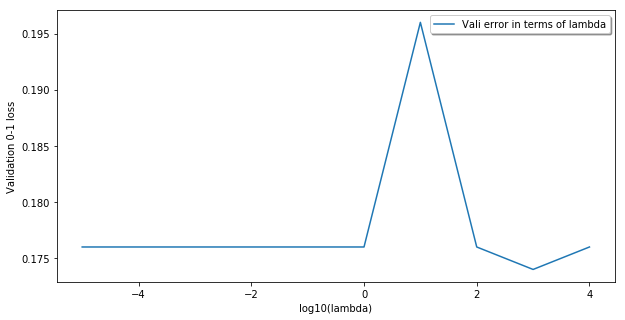

In [87]:
if __name__=='__main__':
    lambda_list=([10**i for i in np.arange(-5.0,5.0,1.0)])
    (w_l,time_l,epoches_l)=Para_Search_6_8(lambda_list,0.000)

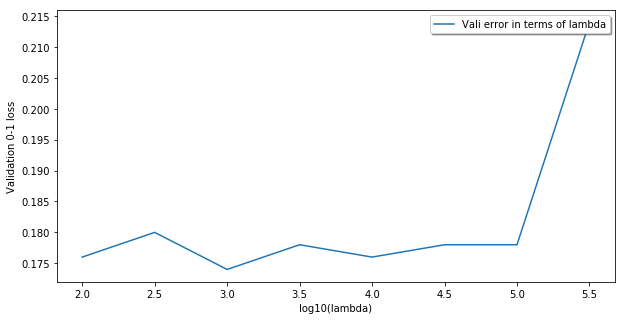

In [89]:
if __name__=='__main__':
    lambda_list=([10**i for i in np.arange(2.0,6.0,0.5)])
    (w_l2,time_l2,epoches_l2)=Para_Search_6_8(lambda_list,error_thre=0.001)

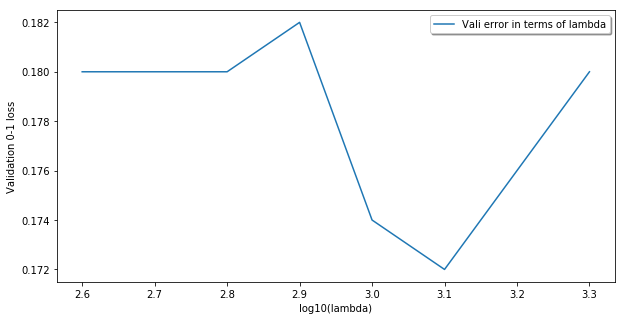

In [101]:
if __name__=='__main__':
    lambda_list1=([10**i for i in np.arange(2.6,3.4,0.1)])
    (w_l3,time_l3,epoches_l3)=Para_Search_6_8(lambda_list1,error_thre=0)

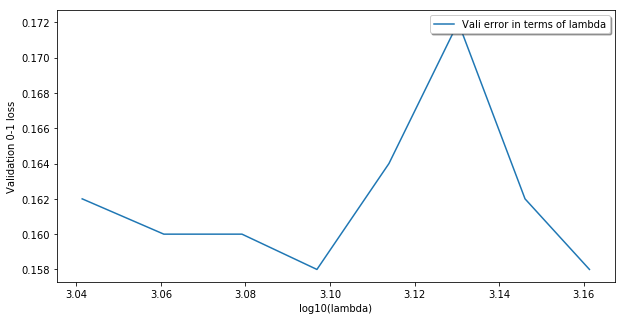

In [23]:
if __name__=='__main__':
    lambda_list2=(np.arange(1100.0,1500.0,50.0))
    (w_l4,time_l4,epoches_l4)=Para_Search_6_8(lambda_list2,error_thre=0)

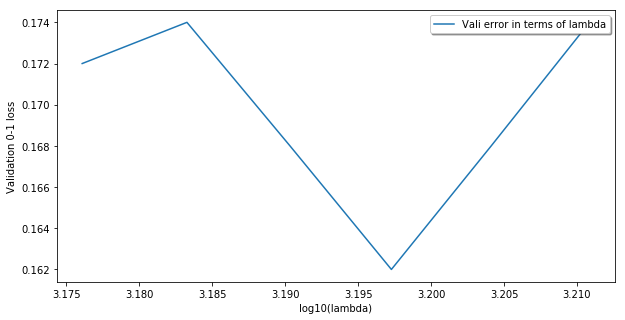

In [29]:
if __name__=='__main__':
    lambda_list3=(np.arange(1500.0,1650.0,25.0))
    (w_l5,time_l5,epoches_l5)=Para_Search_6_8(lambda_list3,error_thre=0,iter_max_n=1500)

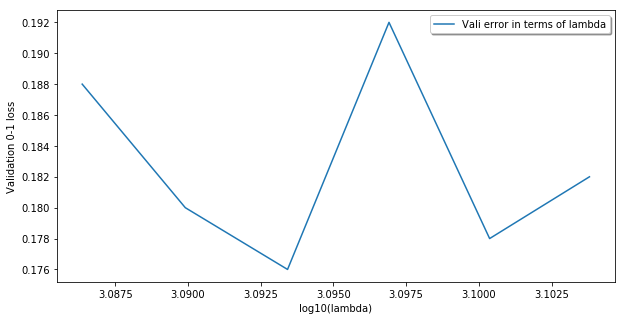

In [14]:
if __name__=='__main__':
    lambda_list3=(np.arange(1220.0,1280.0,10))
    (w_l6,time_l6,epoches_l6)=Para_Search_6_8(lambda_list3,error_thre=0,iter_max_n=1500)

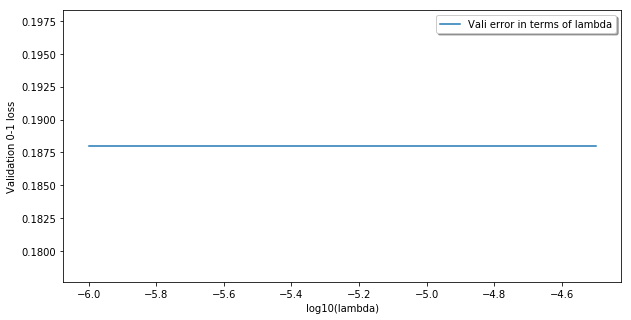

In [30]:
if __name__=='__main__':
    lambda_list=([10**i for i in np.arange(-6.0, -4.0 ,0.5)])
    (w_l35,time_l35,epoches_l35)=Para_Search_6_8(lambda_list,0.000,iter_max_n=1500)

Conclusion: With the three parameter searches, we can get the best lambda is around $\lambda=1230$. With this lambda, we can obtain a minimum validation (test) error of 0.150.

#### 6.9 Magnitude of "score"

In [15]:
def score_recorder(X,y,w):
    m=len(X)
    score_pred=np.zeros((m,2))
    y_pred=[]
    err_total=0
    for j in range(m):
        temp=dotProduct(w,X[j])
        score_pred[j,0]=temp
        y_pred.append(1) if temp>0 else y_pred.append(-1)
        if y_pred[j]!=y[j]:
            err_total+=1
            score_pred[j,1]=1
    return(score_pred)

In [16]:
def func_6_9():
    score_pred=score_recorder(X_vali,y_vali,w_l6[1])
    #print(score_pred)
    score_pred=pd.DataFrame(score_pred,index=range(len(score_pred)),columns=['score','TF'])
    print("max_score:",max(score_pred.loc[:,'score']))
    print("min_score:",min(score_pred.loc[:,'score']))
    scores=[]
    for i in np.arange(-0.0002,0.0001,0.00002):
        j=i+0.0001
        print(score_pred[score_pred['score']>i][score_pred['score']<=j].loc[:,'TF'])
        scores.append(np.mean(score_pred[score_pred['score']>i][score_pred['score']<=j].loc[:,'TF']))
    return(scores)

In [77]:
if __name__=='__main__':
    scores=func_6_9()

max_score: 0.000284290311653
min_score: -0.000185111788618
130    0.0
143    0.0
155    0.0
187    0.0
197    0.0
259    0.0
278    0.0
319    0.0
353    0.0
363    0.0
448    0.0
464    0.0
Name: TF, dtype: float64
48     0.0
93     0.0
99     0.0
126    0.0
130    0.0
134    0.0
135    0.0
155    0.0
187    0.0
197    0.0
216    0.0
233    0.0
259    0.0
278    0.0
319    0.0
353    0.0
355    0.0
363    0.0
448    0.0
452    0.0
464    0.0
471    0.0
480    0.0
Name: TF, dtype: float64
1      0.0
27     0.0
48     0.0
62     0.0
92     0.0
93     0.0
99     0.0
104    0.0
121    0.0
126    0.0
130    0.0
134    0.0
135    0.0
148    0.0
186    0.0
187    0.0
190    0.0
197    0.0
208    0.0
216    0.0
219    0.0
229    0.0
233    0.0
237    0.0
250    0.0
259    0.0
269    0.0
278    0.0
319    0.0
335    0.0
340    1.0
346    0.0
353    0.0
355    0.0
360    0.0
363    0.0
368    0.0
399    0.0
413    0.0
418    0.0
421    0.0
422    0.0
427    0.0
448    0.0
449    0.0
452    0.0


C:\Applications\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Applications\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [78]:
scores

[0.0,
 0.0,
 0.02,
 0.02040816326530612,
 0.04819277108433735,
 0.1440677966101695,
 0.1917808219178082,
 0.20408163265306123,
 0.21492537313432836,
 0.2326388888888889,
 0.18061674008810572,
 0.11377245508982035,
 0.042105263157894736,
 0.016666666666666666,
 0.0]

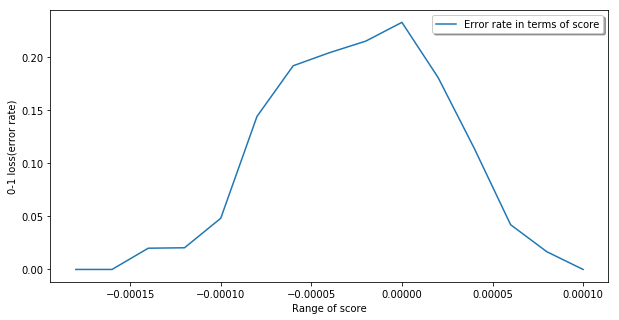

In [80]:
fig,ax1=plt.subplots(figsize=(10,5))
lines=locals()
lines['1'],=ax1.plot(np.arange(-0.00018,0.00012,0.00002),scores,label='Error rate in terms of score')
legend=ax1.legend(loc='upper right',shadow=True)
ax1.set_xlabel("Range of score")
ax1.set_ylabel('0-1 loss(error rate)')
plt.show()

Conclusion: With a score higher than 0.00006 or lower than -0.0001, the error rate is below 5%, thus we get a high confidence in those ranges. The error rate between the two values are significantly high. It is clear that there's a correlation between higher magnitude score and accuracy.

#### 6.10

In [24]:
def Pegasos_1_test(X,y,lambda_reg,error_thre=0.001,iter_max=500,t=0,w=0,skip_judg_zero=False,step_shorten=1,range1=0.001):
    w={}
    m=len(X)
    Termi_con=1 ##Tremination condition
    time_list=[]
    judge_zero=0
    judg_zero_rate=[]
    while Termi_con<iter_max:
        time_s=time.time()
        judge_zero=0
        #error_total=0
        for j in range(m):
            
            t=t+1
            eta=1/(t*lambda_reg)
            wxj=dotProduct(w,X[j])
            if y[j]*wxj<1-range1:
                increment(w,y[j]/lambda_reg,X[j])
                #error_total+=1
            elif y[j]*wxj/t<=1+range1 and y[j]*wxj/t>=1-range1:
                judge_zero+=1
        time_e=time.time()
        #print("time:",time_e-time_s)
        print("zeros:",judge_zero)
        judg_zero_rate.append(judge_zero/m) #append the rate ywx=1
        time_list.append(time_e-time_s)
        Termi_con+=1
#         if (float(error_total/m))<=error_thre:
#             break
    return(w,time_list,Termi_con,judg_zero_rate)

In [64]:
score=score_recorder(X_vali,y_vali,w10)
np.mean(score[:,1])

0.184

In [29]:
if __name__=="__main__":
    (w10,time_list10,Termi_con10,judg_zero_rate10)=Pegasos_1_test(X_train,y_train,lambda_reg=1,skip_judg_zero=True,iter_max=50,range1=0.0012)
    score=score_recorder(X_vali,y_vali,w10)
    print(np.mean(score[:,1]))

zeros: 0
zeros: 0
zeros: 2
zeros: 0
zeros: 2
zeros: 3
zeros: 0
zeros: 1
zeros: 0
zeros: 1
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
zeros: 0
0.166


In [41]:
if __name__=="__main__":
    (w10s,time_list10s,Termi_con10s,judg_zero_rate10s)=Pegasos_1_test(X_train,y_train,skip_judg_zero=True,lambda_reg=1230,iter_max=50)
    score_skip=score_recorder(X_vali,y_vali,w10s)
    print('score_skip_1=',score_skip)

time: 16.415852546691895
time: 21.660357236862183
time: 20.521013498306274
time: 24.44044852256775
time: 20.623234272003174
time: 22.715135097503662
time: 27.56911039352417
time: 24.870702028274536
time: 21.191461086273193
time: 24.1956045627594
time: 24.264910221099854
time: 20.789469242095947
time: 20.949463844299316
time: 20.524921655654907
time: 20.784363269805908
time: 20.571743965148926
time: 20.517685651779175
time: 20.697697639465332
time: 20.318090677261353
time: 20.49989342689514
time: 21.39471983909607
time: 20.474005222320557
time: 20.523626565933228
time: 20.588541269302368
time: 21.66745114326477
time: 27.655890464782715
time: 35.55448269844055
time: 22.790955305099487
time: 21.969156742095947
time: 23.277603149414062
time: 29.375892400741577
time: 23.174935579299927
time: 21.633111715316772
time: 21.899518251419067
time: 21.971529006958008
time: 23.356876850128174
time: 22.870670557022095
time: 21.60617208480835
time: 21.802725315093994
time: 21.831722497940063
time: 21.

In [47]:
np.mean(score_skip[:,1])

0.49399999999999999

In [59]:
score_aa=score_recorder(X_vali,y_vali,w1)
np.mean(score_aa[:,1])

0.19400000000000001

In [49]:
(w_tt,t_tt)=Pegasos_SVM(X_train,y_train,1)
score_bbb=score_recorder(X_vali,y_vali,w_tt)
np.mean(score_bbb[:,1])

time: 9.69062328338623
time: 17.095768690109253
time: 17.3746280670166
time: 17.537158489227295
time: 17.602476119995117
time: 17.64150071144104
time: 17.740270614624023
time: 18.21143388748169
time: 17.632915258407593
time: 17.678072690963745
time: 18.30727195739746
time: 17.815963983535767
time: 17.696365118026733
time: 17.65057682991028
time: 20.53783893585205
time: 18.501195669174194
time: 20.853981971740723
time: 19.589664220809937
time: 20.117709398269653
time: 18.915591955184937
time: 20.59840989112854
time: 20.187843322753906
time: 20.012874126434326
time: 19.362014055252075
time: 18.236109972000122
time: 19.262465238571167
time: 17.7935152053833
time: 17.150100708007812
time: 17.16318392753601
time: 17.111140251159668
time: 17.24789524078369
time: 17.21704602241516
time: 17.218796014785767
time: 17.242979288101196
time: 17.16168713569641
time: 17.293126821517944
time: 17.245492935180664
time: 17.235870838165283
time: 19.34506893157959
time: 21.051575899124146
time: 22.27660584

0.19400000000000001

In [45]:
if __name__=="__main__":
    step_shorten=([i for i in np.arange(0.99,0.90,-0.02)])
    score_shorten=[]
    for i in range(len(step_shorten)):
        (w10st,time_list10st,Termi_con10st,judg_zero_rate10st)=Pegasos_1_test(X_train,y_train,skip_judg_zero=True,\
                                                                              lambda_reg=1230,iter_max=50,step_shorten=step_shorten[i])
        score_shorten.append(score_recorder(X_vali,y_vali,w10st))
        print('step_shorten_%=%' %step_shorten[i],score_shorten[i])

SyntaxError: positional argument follows keyword argument (<ipython-input-45-fdb10a17e701>, line 5)

In [ ]:
judg_zero_rate10

### 7 Error Analysis

In [19]:
def func_weight_dict(vec,w):
    rank_dict={}
    for k in vec:
        rank_dict[k]=[np.abs(vec[k]*w[k]),np.sign(vec[k]*w[k])]
    return(rank_dict)

In [22]:
score_pred=score_recorder(X_vali,y_vali,w_l6[1])
score_pred=pd.DataFrame(score_pred,index=range(len(score_pred)),columns=['score','TF'])
score_pred[score_pred['TF']==1].loc[:50,]

,score,TF
10,0.000018,1.0
11,-0.000004,1.0
16,-0.000022,1.0
17,0.000004,1.0
19,-0.000012,1.0
25,-0.000023,1.0
26,0.000034,1.0
31,0.000012,1.0
33,0.000017,1.0
34,0.000017,1.0


In [36]:
def func_7_1(num):
    ran_dict=func_weight_dict(X_vali[num],w_l6[1])
    for key, value in sorted(ran_dict.items(), key=lambda item: (item[1][0], item[0]), reverse=True):
        print ("Key: %s \t Times: %s \t Weight in W: %.6s \t Weight: %.6f, %s" % \
               (key, X_vali[num][key], w_l6[1][key], value[0], value[1]))

In [37]:
func_7_1(26)

Key: the 	 Times: 33 	 Weight in W: 4.6110 	 Weight: 0.000015, 1.0
Key: and 	 Times: 14 	 Weight in W: 1.0435 	 Weight: 0.000015, 1.0
Key: is 	 Times: 14 	 Weight in W: 8.0087 	 Weight: 0.000011, 1.0
Key: , 	 Times: 19 	 Weight in W: 4.9346 	 Weight: 0.000009, 1.0
Key: have 	 Times: 5 	 Weight in W: -1.755 	 Weight: 0.000009, -1.0
Key: . 	 Times: 32 	 Weight in W: -2.669 	 Weight: 0.000009, -1.0
Key: this 	 Times: 4 	 Weight in W: -1.860 	 Weight: 0.000007, -1.0
Key: last 	 Times: 2 	 Weight in W: -2.887 	 Weight: 0.000006, -1.0
Key: to 	 Times: 5 	 Weight in W: -9.464 	 Weight: 0.000005, -1.0
Key: will 	 Times: 2 	 Weight in W: 2.2489 	 Weight: 0.000004, 1.0
Key: ;the 	 Times: 3 	 Weight in W: 1.2377 	 Weight: 0.000004, 1.0
Key: of 	 Times: 9 	 Weight in W: -4.125 	 Weight: 0.000004, -1.0
Key: good 	 Times: 2 	 Weight in W: 1.7554 	 Weight: 0.000004, 1.0
Key: evil 	 Times: 3 	 Weight in W: 1.1001 	 Weight: 0.000003, 1.0
Key: ) 	 Times: 5 	 Weight in W: -6.552 	 Weight: 0.000003, -1.0


In [38]:
func_7_1(25)

Key: and 	 Times: 38 	 Weight in W: 1.0435 	 Weight: 0.000040, 1.0
Key: the 	 Times: 74 	 Weight in W: 4.6110 	 Weight: 0.000034, 1.0
Key: , 	 Times: 54 	 Weight in W: 4.9346 	 Weight: 0.000027, 1.0
Key: is 	 Times: 26 	 Weight in W: 8.0087 	 Weight: 0.000021, 1.0
Key: to 	 Times: 21 	 Weight in W: -9.464 	 Weight: 0.000020, -1.0
Key: " 	 Times: 42 	 Weight in W: -4.691 	 Weight: 0.000020, -1.0
Key: on 	 Times: 8 	 Weight in W: -1.998 	 Weight: 0.000016, -1.0
Key: first 	 Times: 8 	 Weight in W: 1.8606 	 Weight: 0.000015, 1.0
Key: no 	 Times: 6 	 Weight in W: -2.475 	 Weight: 0.000015, -1.0
Key: bad 	 Times: 2 	 Weight in W: -7.232 	 Weight: 0.000014, -1.0
Key: . 	 Times: 50 	 Weight in W: -2.669 	 Weight: 0.000013, -1.0
Key: project 	 Times: 8 	 Weight in W: -1.593 	 Weight: 0.000013, -1.0
Key: of 	 Times: 27 	 Weight in W: -4.125 	 Weight: 0.000011, -1.0
Key: with 	 Times: 12 	 Weight in W: 9.1412 	 Weight: 0.000011, 1.0
Key: very 	 Times: 4 	 Weight in W: 2.5886 	 Weight: 0.000010, 

In [105]:
print(vali[35])

['in', 'china', 'in', '1982', 'i', 'turned', 'the', 'tables', 'on', 'our', 'national', 'guide', 'and', 'asked', 'him', 'if', 'he', 'had', 'any', 'questions', 'about', 'america', '.', ';i', 'guess', 'i', 'was', 'expecting', 'some', 'sort', 'of', 'political', 'question', '.', ';instead', ',', 'i', 'was', 'dumfounded', 'by', 'what', 'was', 'most', 'on', 'his', 'mind', '.', ';', '"', 'in', 'america', ',', 'do', 'wives', 'and', 'their', 'mothers-in-law', 'get', 'along', 'well', '?', '"', ';he', 'assured', 'me', 'in', 'china', 'that', 'they', 'did', ',', 'but', 'i', 'am', 'certain', 'if', 'that', 'were', 'true', 'he', 'would', 'not', 'have', 'asked', '.', ';even', 'in', 'china', 'people', 'seem', 'to', 'have', 'problems', 'relating', 'to', 'in-', 'laws', '.', ';perhaps', 'some', 'of', "life's", 'most', 'difficult', 'relationships', 'arise', 'when', 'families', 'are', 'suddenly', 'artificially', 'joined', 'by', 'marriage', '.', ';a', 'man', 'trying', 'to', 'relate', 'to', 'his', 'new', 'prosp

In [106]:
print(vali[30])

['let', 'me', 'first', 'say', 'that', 'the', 'conditions', 'that', 'i', 'was', 'forced', 'to', 'watch', 'the', 'matrix', 'under', 'were', 'less', 'than', 'ideal', '.', ';so', 'i', 'have', 'tried', 'to', 'be', 'as', 'fair', 'as', 'possible', 'considering', 'that', 'my', 'viewing', 'experience', 'was', 'significantly', 'less', 'than', 'ideal', '.', ';i', 'watched', 'the', 'matrix', 'in', 'a', 'theater', 'that', 'is', 'in', 'serious', 'need', 'of', 'upgrades', 'at', 'the', 'best', 'of', 'times', '.', ';under', 'no', 'circumstances', ',', 'should', 'it', 'have', 'ever', 'been', 'allowed', 'to', 'show', 'a', 'big', 'budget', 'special', 'effects', 'laden', 'film', 'like', 'the', 'matrix', '.', ';this', 'theater', ',', 'owned', 'by', 'the', 'parent', 'company', 'of', 'one', 'of', "hollywood's", 'biggest', 'studios', ',', "hasn't", 'even', 'graduated', 'into', 'stereo', 'sound', 'yet', '.', ';the', 'mono', 'sound', 'that', 'the', 'audience', 'was', 'subjected', 'to', 'sounded', 'as', 'if', 'it

Conclusion: <br>
Comment 35 should be a negative comment but was classified as positive, while the 30th should be a positive but also misclassified. With the key-weight list, we can see most mistakes was made by the high-wight of pronouns ,conjunctions and prepositions. For example, in comment 35, "he", "and", "does", "i" and "see" all made huge contribution to positive weight, but those words are nearly all neutral. As contrast, the first person version "do" shows a negative weight. On the other hand, the negative words like "uncomfortable" (shows one time, weight 3.4722222222222219e-07) and "wrong" (shows 1 time, weights 9.485094850948498e-07) only gives little contribute to the total weight, which is actually very important indicators to the attitude of comment.<br>
As for a deeper reason, the comment 35 talked about movies the auditor admired with lots of words and contradicted with this movie with a "but". This needs more logical algorithms to deal with.<br>
For comment 30, we can see pronoun "this", no meaning "." and preposition "on" both give high negative weights, which made the total weight lower than zero. However, there's an interesting thing that this comment uses 3 "bad" words which also have high negative weight. We can see this comment suggests that the "sound" in this movie is very bad, but the auditor follows up with a turning point that he will put the sound aside and value the movie on other elements. Thus makes the classification of this comment hard and needs more logical organize on the features.<br>
The most possible ways to deal with these misclassifications might be giving the pronouns, conjunctions and prepositions a lower weight or no weight, or build more features which are combinations of words to provide some advanced meaning.<br>
Possible new feature:<br>
We can build some new features based on the very-high frequency words, and give them a lower weight(maybe 1/10 or 1/100 of the calculated value), and make them less important for the decision. We can also build "phrase" features, for example, a phrase like "with exciting" or "with disappointing" will be more meaningful than the single "with".